# Emoji Prediction

## Team Members:
    -Akshat Maheshwari (20161024)
    -Kalpit Pokra (20161134)
    -Kushagra Nagori (20161032)
    -Kartik Garg (20161219)
    
In this part of the project, we have used the word vector representations to build the emoji predictor.

Along with that, we have used the CLDR codes of the emojis and the emoji python library to print the emoji.

In [1]:
import numpy as np
from emo_utils import *
import emoji
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
X_train, Y_train = read_csv('data/train_emoji.csv')
X_test, Y_test = read_csv('data/tess.csv')

In [3]:
maxLen = len(max(X_train, key=len).split())

In [4]:
index = 2
print(X_train[index], label_to_emoji(Y_train[index]))

It is the worst day in my life 😞


In this part, we are converting the training and testing labels into One-Hot Vectors, so that it is suitable for training the models.

In [5]:
# 24 is used, since we have 24 kinds of emojis in the emoji dictionary.

Y_oh_train = convert_to_one_hot(Y_train, C = 24)
Y_oh_test = convert_to_one_hot(Y_test, C = 24)

In [6]:
index = 50
print(Y_train[index], "is converted into one hot", Y_oh_train[index])

0 is converted into one hot [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


The first step is to convert an input sentence into the word vector representation, which then get averaged together. We will use the 50-dimensional GloVe embeddings ([Link](https://nlp.stanford.edu/projects/glove/)).

In [7]:
word_to_index, word_to_vec_map = read_glove_vecs('data/glove.6B.50d.txt')

- `word_to_index`: dictionary mapping from words to their indices in the vocabulary (400,001 words, with the valid indices ranging from 0 to 400,000)
- `word_to_vec_map`: dictionary mapping words to their GloVe vector representation.

In [8]:
def sentence_to_avg(sentence, word_to_vec_map):
    words = [word.lower() for word in sentence.split(' ') if word != '']

    avg = np.zeros(word_to_vec_map["cucumber"].shape)
    
    for w in words:
        if w in word_to_vec_map:
            avg += word_to_vec_map[w]
    avg = avg / float(len(words))
    
    return avg

In [9]:
avg = sentence_to_avg("I am a computer science student", word_to_vec_map)
print("avg = ", avg)

avg =  [-0.152426    0.36657333  0.25175683 -0.20969533  0.47594378 -0.25841217
 -0.378095   -0.40567833 -0.37233333  0.1440341   0.04078167 -0.00905833
 -0.418224    0.16384267  0.44825333  0.03722667 -0.28598     0.77520833
 -0.26075567  0.02292833  0.26706017  0.64319333  0.10002667  0.39073167
  0.66011667 -1.84776667 -0.58223    -0.32355167  0.01468667 -0.19120767
  3.09491667 -0.11282833 -0.42566167 -0.58604833 -0.168337   -0.01603667
  0.12241     0.47339833  0.53444333 -0.19619633  0.17200412 -0.1731205
 -0.1347615   0.55248033  0.08167183  0.10617     0.30711833  0.077814
  0.06971373  0.56611667]


In [10]:
def model(X, Y, word_to_vec_map, learning_rate = 0.01, num_iterations = 1000):
    train_len, num_classes, glove_dims = Y.shape[0], 24, 50
    
    W = np.random.randn(num_classes, glove_dims) / np.sqrt(glove_dims)
    b = np.zeros((num_classes,))
    
    Y_oh = convert_to_one_hot(Y, C = num_classes)
    
    for t in range(num_iterations):
        for i in range(train_len):            
            avg = sentence_to_avg(X[i], word_to_vec_map)

            a = softmax(np.dot(W, avg) + b)

            cost = -np.squeeze(np.sum(Y_oh[i] * np.log(a)))

            db = dz = a - Y_oh[i]
            dW = np.dot(dz.reshape(num_classes,1), avg.reshape(1, glove_dims))

            W, b = W - learning_rate * dW, b - learning_rate * db 
        
        if t % 100 == 0:
            print("Epoch: " + str(t) + " --- cost = " + str(cost))
            pred = predict(X, Y, W, b, word_to_vec_map)

    return pred, W, b

In [11]:
print(X_train.shape)
print(Y_train.shape)
print(np.eye(24)[Y_train.reshape(-1)].shape)

(315,)
(315,)
(315, 24)


In [12]:
pred, W, b = model(X_train, Y_train, word_to_vec_map)
print(pred)

Epoch: 0 --- cost = 1.0363098753587459
Accuracy: 0.3492063492063492
Epoch: 100 --- cost = 0.5391952609465476
Accuracy: 0.8984126984126984
Epoch: 200 --- cost = 0.38224668026740294
Accuracy: 0.9206349206349206
Epoch: 300 --- cost = 0.29427142225242936
Accuracy: 0.9333333333333333
Epoch: 400 --- cost = 0.23540765253181795
Accuracy: 0.9396825396825397
Epoch: 500 --- cost = 0.192862945103697
Accuracy: 0.9492063492063492
Epoch: 600 --- cost = 0.16065017244258836
Accuracy: 0.9555555555555556
Epoch: 700 --- cost = 0.13547443274063806
Accuracy: 0.9587301587301588
Epoch: 800 --- cost = 0.11534072565007687
Accuracy: 0.9587301587301588
Epoch: 900 --- cost = 0.09897237621020609
Accuracy: 0.9587301587301588
[[3.]
 [2.]
 [3.]
 [0.]
 [4.]
 [0.]
 [3.]
 [2.]
 [3.]
 [1.]
 [3.]
 [3.]
 [1.]
 [3.]
 [2.]
 [3.]
 [2.]
 [3.]
 [1.]
 [2.]
 [3.]
 [0.]
 [2.]
 [2.]
 [2.]
 [1.]
 [4.]
 [3.]
 [2.]
 [4.]
 [0.]
 [3.]
 [4.]
 [2.]
 [0.]
 [3.]
 [2.]
 [2.]
 [3.]
 [4.]
 [2.]
 [2.]
 [0.]
 [2.]
 [3.]
 [0.]
 [3.]
 [2.]
 [4.]
 [

In [14]:
# Run the model on the training and the test set

print("Training set:")
pred_train = predict(X_train, Y_train, W, b, word_to_vec_map)
print('Test set:')
pred_test = predict(X_test, Y_test, W, b, word_to_vec_map)

Training set:
Accuracy: 0.9587301587301588
Test set:
Accuracy: 0.8571428571428571


Now random guessing on some sentences and checking it's validity manually

In [15]:
X_my_sentences = np.array(["i adore you", "i love you", "funny lol", "lets play with a ball", "food is ready", "not feeling happy"])
Y_my_labels = np.array([[0], [0], [2], [1], [4],[3]])

pred = predict(X_my_sentences, Y_my_labels , W, b, word_to_vec_map)
print_predictions(X_my_sentences, pred)

Accuracy: 1.0

i adore you ❤
i love you ❤
funny lol 😄
lets play with a ball ⚾
food is ready 🍴
not feeling happy 😞


(56,)
           ❤    ⚾    😄    😞   🍴
Predicted  0.0  1.0  2.0  3.0  4.0  All
Actual                                 
0            5    0    1    1    0    7
1            0    8    0    0    0    8
2            3    0   14    2    0   19
3            0    0    0   15    0   15
4            0    0    0    1    6    7
All          8    8   15   19    6   56


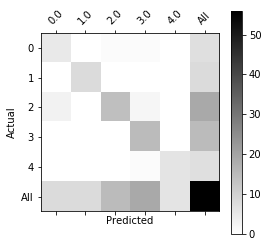

In [16]:
print(Y_test.shape)
print('           '+ label_to_emoji(0)+ '    ' + label_to_emoji(1) + '    ' +  label_to_emoji(2)+ '    ' + label_to_emoji(3)+'   ' + label_to_emoji(4))
print(pd.crosstab(Y_test, pred_test.reshape(56,), rownames=['Actual'], colnames=['Predicted'], margins=True))
plot_confusion_matrix(Y_test, pred_test)

In [23]:
sent = np.array(["I told you not to do that thing", "I love you", "I am mad at you", "i am very cheerful"])
pred = predict1(sent, W, b, word_to_vec_map)

print_predictions(sent, pred)

I told you not to do that thing [3.]
I love you [0.]
I am mad at you [3.]
i am very cheerful [2.]

I told you not to do that thing 😞
I love you ❤
I am mad at you 😞
i am very cheerful 😄
